# Arguments

In [20]:
# inceptionv3-ft-pv-self-eb,ap,lm,ct

num_of_epochs = 100
batch_size = 32

final_model_path= 'model-final.h5'

input_width = 224
input_height = 224
input_depth = 3


# Select validation classes

In [21]:
class_paths_validation = ['../datasets/validation/___Early_blight', '../datasets/validation/___Appids', '../datasets/validation/___Leaf_miner', '../datasets/validation/___Curly_top_virus']

In [30]:
class_labels = ['___Early_blight', '___Appids' , '___Leaf_miner', '___Curly_top_virus']

class_path = '../datasets/validation/___Curly_top_virus'



index = class_paths_validation.index(class_path)
print(index)
print(class_labels[index])


3
___Curly_top_virus


# Load dataset

In [23]:
from imutils import paths
import numpy as np
import os
from sklearn.preprocessing import LabelBinarizer

import sys
sys.path.append('..')

from utils.preprocessors.resize_image_preprocessor import resizeImagePreprocessor
from utils.preprocessors.img_to_array_preprocessor import ImgToArrayPreprocessor
from utils.io.dataset_loader import DatasetLoader

print("[INFO] loading images...")
image_paths = list(paths.list_images(class_path))

# Initial image preprocessing
aap = resizeImagePreprocessor(input_width, input_height)
iap= ImgToArrayPreprocessor()

#Load image data and perform image data preprocessing
dl = DatasetLoader(preprocessors=[aap,iap])
(test_x,test_y)  = dl.load(image_paths,verbose=500)


from sklearn.preprocessing import LabelEncoder

# Encode labels as integers
le = LabelEncoder()
test_y = le.fit_transform(test_y)
test_x = test_x.astype("float") / 255.0


[INFO] loading images...


# Load model from disk

In [24]:
# import tensorflow as tf
# print(tf.__version__)


# model = tf.keras.models.load_model(
#     final_model_path,
#     custom_objects=None,
#     compile=False
# )

from keras.models import load_model

model = load_model(final_model_path)

# Make predictions

In [25]:
# Make predictions on the images
print("[INFO] Predicting...")
predictions = model.predict(test_x, batch_size=batch_size).argmax(axis=1)

print(test_y)
print(predictions)

correct_count = 0
wrong_count = 0
wrong_list = []

for (i, prediction) in enumerate(predictions):
    if(prediction == index):
        correct_count += 1
    else:
        wrong_count +=1
        wrong_list.append(class_labels[prediction])

print(len(predictions))
print('correct_count : ' + str(correct_count))
print('wrong_count : ' + str(wrong_count))

from collections import Counter
keys = Counter(wrong_list).keys() # equals to list(set(words))
values = Counter(wrong_list).values() # counts the elements' frequency

print(keys)
print(values)
    

[INFO] Predicting...
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 1 1 1 0 0 1 1 1 1 1]
14
correct_count : 0
wrong_count : 14
dict_keys(['___Appids', '___Early_blight'])
dict_values([10, 4])


In [26]:
import cv2
import matplotlib.pyplot as plt
import time

# loop over the sample images
for (i, image_path) in enumerate(image_paths):
    # Load the example image, draw the prediction, and display it
    image = plt.imread(image_path)
    color = (0, 255, 0)
    if(predictions[i] == index):
        color = (255, 0, 0)
        font_size = int(image.shape[1] * (0.2/100))
        font_thickness = int(image.shape[1] * (0.2/30))
        cv2.putText(image, "Label: {}".format(class_labels[predictions[i]]), (100, 100), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, font_thickness)
        plt.subplots(1, 1)
        plt.imshow(image)
        print(image_path)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


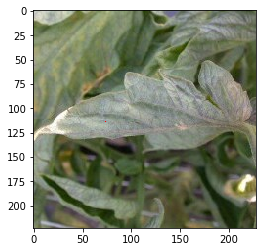

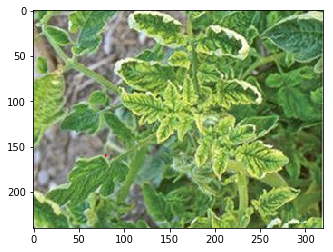

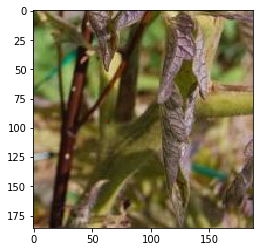

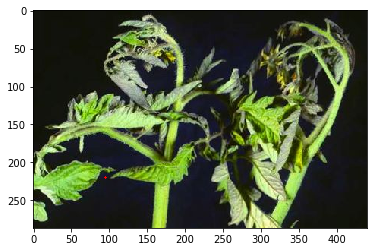

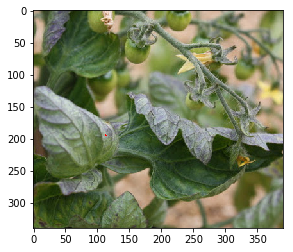

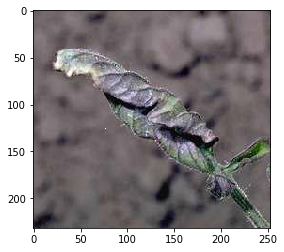

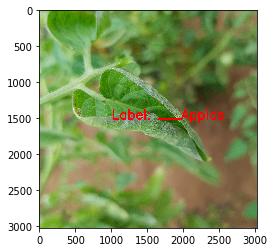

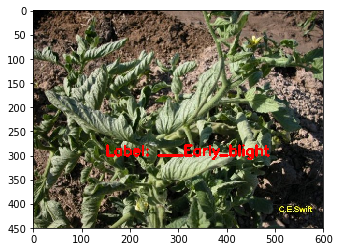

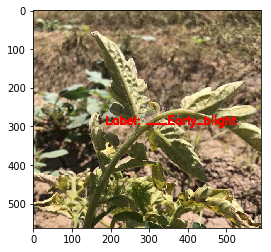

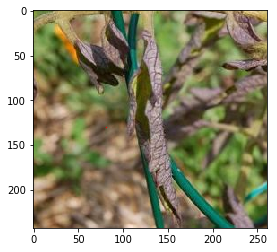

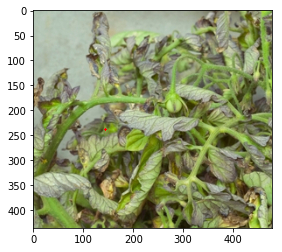

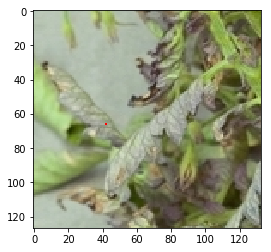

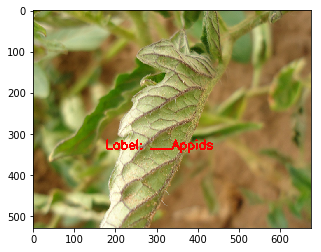

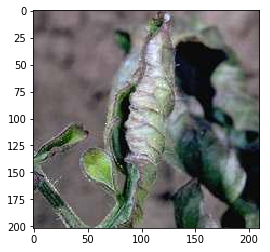

In [29]:
import cv2
import matplotlib.pyplot as plt
import time

# loop over the sample images
for (i, image_path) in enumerate(image_paths):
    # Load the example image, draw the prediction, and display it
    image = plt.imread(image_path)
    color = (0, 255, 0)
    if(predictions[i] != index):
        color = (255, 0, 0)
        font_size = int(image.shape[1] * (0.2/100))
        font_thickness = int(image.shape[1] * (0.2/30))
        x_pos = int(image.shape[0]/3)
        y_pos = int(image.shape[1]/2)
        image_pos = (x_pos, y_pos)
        cv2.putText(image, "Label: {}".format(class_labels[predictions[i]]), image_pos, cv2.FONT_HERSHEY_SIMPLEX, font_size, color, font_thickness)
        plt.subplots(1, 1)
        plt.imshow(image)
